<a href="https://colab.research.google.com/github/shubhams821/ML-Repository/blob/main/K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.spatial import distance
df1 = pd.read_csv('data.csv')
for i in df1:
  print(i)

df1_arr = np.array(df1)

x
y
color


In [ ]:
df1_data_points = df1_arr[:,0:2]
df1_label =df1_arr[:,2]

In [ ]:
df1

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0
...,...,...,...
331,638.916471,323.569096,1
332,542.005901,347.527070,0
333,611.964612,377.254978,0
334,520.654168,455.996453,0


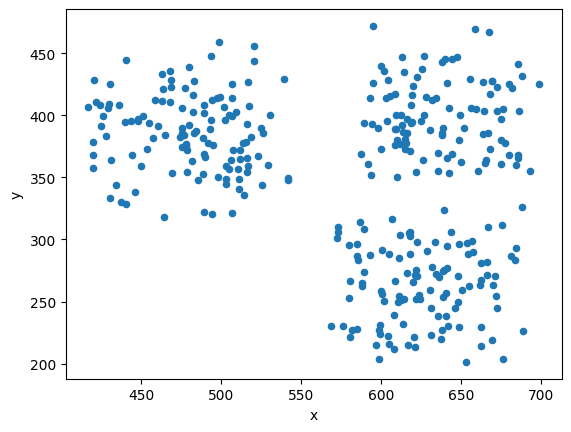

In [ ]:
df1.plot(kind='scatter',x= 'x',y = 'y')
plt.show()

**Creating Random Points**

In [ ]:
def rand_list(n):
  z_3 = [];
  for i in range(len(df1_arr)):
    z_3.append(random.randint(0, n-1))
  return z_3

**Assigning Mean to each cluster**

In [ ]:
def clus_mean(df1_data_points,z_3,n):
  mean_vec = [0 for i in range (n)]
  count_vec = [0 for i in range (n)]

  for i in range(len(z_3)):
    mean_vec[z_3[i]] += df1_data_points[i,:]
    count_vec[z_3[i]]+= 1

  for i in range(n):
    mean_vec[i]/=count_vec[i]
  return np.array(mean_vec)



In [ ]:
mean_vec = clus_mean(df1_data_points,z_3,3)

NameError: ignored

**Getting Distance**

In [ ]:
def get_dist(df1_data_points,mean_vec,z_3):

  dist = [0 for i in range(len(mean_vec))]
  for i in range(len(z_3)):
    dist[z_3[i]]+= distance.euclidean(mean_vec[z_3[i]], df1_data_points[i,:])
  return sum(dist)

In [ ]:
get_dist(df1_data_points,mean_vec,z_3)

**Reassigning Clusters**

In [ ]:
def reassign(data,z,mean):
  for i in range(len(data)):
    dist = distance.euclidean(mean[z[i]], data[i,:])
    cen = z[i]
    for j in range(len(mean)):
      temp_dis = distance.euclidean(mean[j], data[i,:])

      if(dist>temp_dis):
        cen = j
        dist = temp_dis
    z[i] = cen
  return z

In [ ]:
# [mean_0, mean_1, mean_2] = clus_mean(df1_data_points,z_3)
reassign(df1_data_points,z_3,mean_vec)

**Running While loop till Convergence**



In [ ]:
dist_list = [0,1];
i = 1;
n = 3
z_3 = rand_list(n)
while dist_list[i] != dist_list[i-1]:
  mean_vec = clus_mean(df1_data_points,z_3,n)
  dist_list.append(get_dist(df1_data_points,mean_vec,z_3))
  get_dist(df1_data_points,mean_vec,z_3)
  reassign(df1_data_points,z_3,mean_vec)
  i+=1



In [ ]:
dist_list

[0,
 1,
 33184.264511060006,
 19318.580745746385,
 14192.538865821909,
 13345.652638551626,
 13345.652638551626]

**Plotting Actual Vs Trained values**

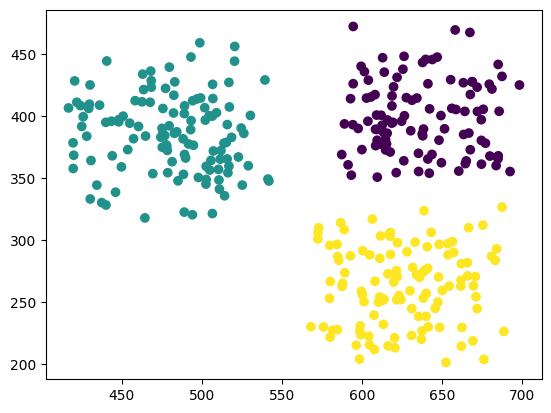

In [ ]:
plt.scatter(df1_arr[:,0], df1_arr[:,1],c = z_3)


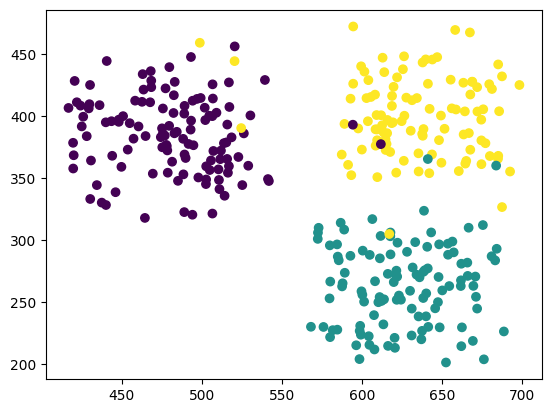

In [ ]:
plt.scatter(df1_arr[:,0], df1_arr[:,1],c = df1_label)

In [ ]:
from numpy import hstack
from numpy.random import normal
from sklearn.mixture import GaussianMixture

In [ ]:
model = GaussianMixture(n_components=3, init_params='random')

In [ ]:
model.fit(df1_arr)

GaussianMixture(init_params='random', n_components=3)

In [ ]:

y_pred = model.predict(df1_arr)

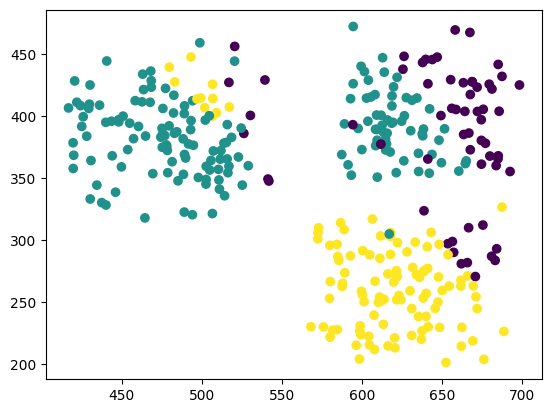

In [ ]:
plt.scatter(df1_arr[:,0], df1_arr[:,1],c = y_pred)

In [ ]:

y_pred - df1_label

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        2.,  2.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

Text(0.5, 1.0, 'Actual Dataset')

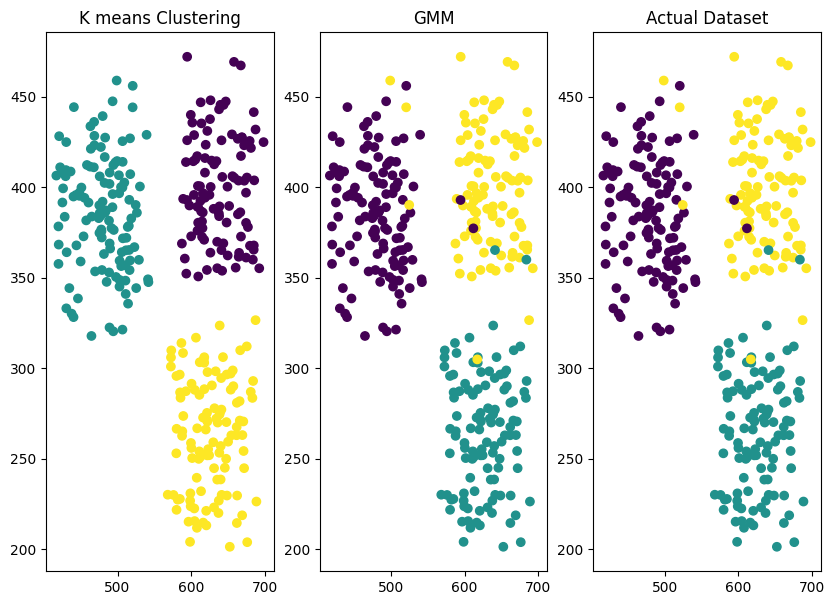

In [ ]:
# Adds a subplot at the 1st position
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)

# showing image
plt.scatter(df1_arr[:,0], df1_arr[:,1],c = z_3)
plt.title("K means Clustering")


# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.scatter(df1_arr[:,0], df1_arr[:,1],c = y_pred)

plt.title("GMM")


# Adds a subplot at the 3nrd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.scatter(df1_arr[:,0], df1_arr[:,1],c = df1_label)
plt.title("Actual Dataset")